In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('andmed.tsv', sep='\t')

import pandas as pd
import numpy as np

unique_signals = pd.unique(df[['signal1', 'signal2']].values.ravel())
unique_signals = sorted(unique_signals)
signal_to_index = {sig: i for i, sig in enumerate(unique_signals)}

n = len(unique_signals)
matrix = np.full((n, n), np.nan)

for _, row in df.iterrows():
    i = signal_to_index[row["signal1"]]
    j = signal_to_index[row["signal2"]]
    value = str(round(row["PP.H4"], 2))
    matrix[i, j] = value
    matrix[j, i] = value

np.fill_diagonal(matrix, 1)

matrix_df = pd.DataFrame(matrix, index=range(n), columns=range(n))

latex_str = matrix_df.to_latex(
    index=True,
    float_format=lambda x: f"${x:.2f}".replace('.', ',') + "$",
    na_rep=r"$\text{na}$",
    caption="Y maatriks",
    label="tab: Y maatriks"
)


print(latex_str)


\begin{table}
\caption{Y maatriks}
\label{tab: Y maatriks}
\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 \\
\midrule
0 & $1,00$ & $0,78$ & $0,65$ & $0,64$ & $0,77$ & $0,74$ & $0,07$ & $0,11$ & $0,85$ & $0,97$ & $0,65$ & $0,01$ & $0,91$ & $0,47$ & $0,15$ & $0,92$ & $0,77$ & $0,99$ \\
1 & $0,78$ & $1,00$ & $0,83$ & $0,83$ & $0,98$ & $0,92$ & $0,43$ & $0,56$ & $0,92$ & $0,77$ & $0,76$ & $0,45$ & $0,97$ & $0,73$ & $0,69$ & $0,94$ & $0,81$ & $0,95$ \\
2 & $0,65$ & $0,83$ & $1,00$ & $0,52$ & $0,83$ & $0,71$ & $0,36$ & $0,45$ & $0,76$ & $0,59$ & $0,48$ & $0,39$ & $0,80$ & $0,52$ & $0,56$ & $0,76$ & $0,63$ & $0,76$ \\
3 & $0,64$ & $0,83$ & $0,52$ & $1,00$ & $0,81$ & $0,79$ & $0,63$ & $0,81$ & $0,78$ & $0,54$ & $0,48$ & $0,83$ & $0,79$ & $0,52$ & $0,67$ & $0,76$ & $0,73$ & $0,71$ \\
4 & $0,77$ & $0,98$ & $0,83$ & $0,81$ & $1,00$ & $0,91$ & $0,11$ & $0,14$ & $0,93$ & $0,83$ & $0,81$ & $0,05$ & $0,97$ & $0,64$ & $0,3

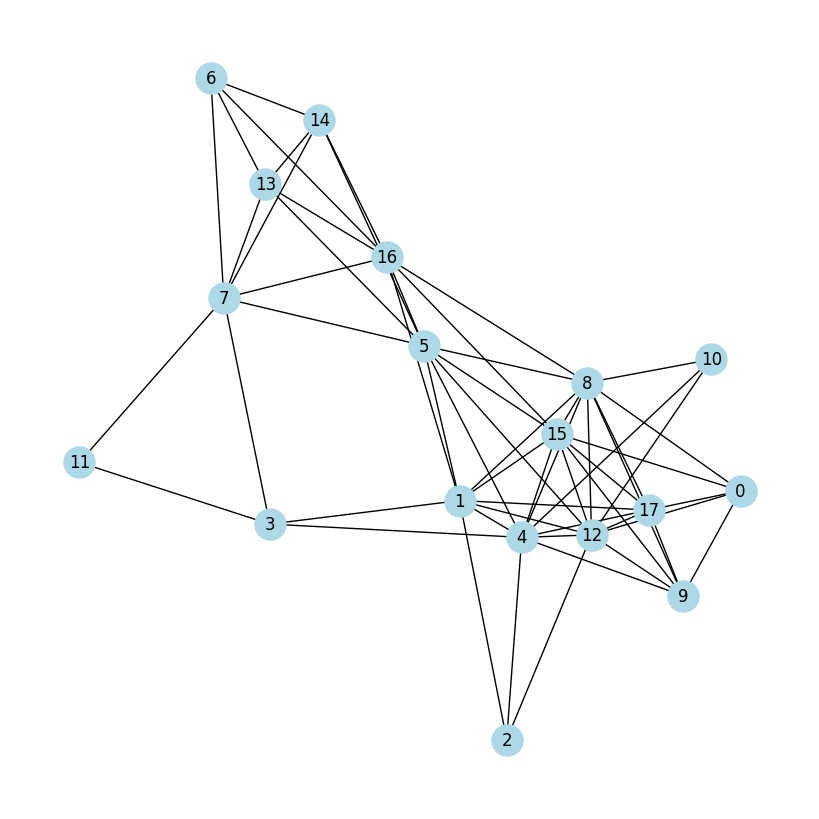

In [52]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

unique_signals = pd.unique(df[['signal1', 'signal2']].values.ravel())
unique_signals = sorted(unique_signals)
signal_to_index = {sig: i for i, sig in enumerate(unique_signals)}

n = len(unique_signals)
matrix = np.full((n, n), np.nan)
for _, row in df.iterrows():
    i = signal_to_index[row["signal1"]]
    j = signal_to_index[row["signal2"]]
    value = round(row["PP.H4"], 2)
    matrix[i, j] = value
    matrix[j, i] = value
np.fill_diagonal(matrix, 1)

matrix_df = pd.DataFrame(matrix, index=range(n), columns=range(n))

G = nx.Graph()
for i in range(n):
    G.add_node(i)

for i in range(n):
    for j in range(i+1, n):
        val = matrix[i, j]
        if not np.isnan(val) and val >= 0.8:
            G.add_edge(i, j, weight=val)

pos = nx.spring_layout(G, seed=1)
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=12)

plt.show()


In [53]:
from itertools import combinations, product
import math

class TreeNode:
    def __init__(self, number, elements, R, U=0):
        self.number = number
        self.elements = elements
        self.R=R
        self.U=U
        self.left = None
        self.right = None

# def d0(i,j,D):
#     return (D[i,j])**(1/2)

def d1(i,j,D):
    return abs(D[i,j]-1)**(1/2)

def R_fn(node, D):
    sum = 0
    for x, y in product(node, node):
        sum += d1(x,y,D)
    return sum

def U_fn(child_1, child_2, D):
    sum = 0
    for x, y in product(child_1, child_2):
        sum += d0(x,y,D)
    return sum

def tree_R_fn(node, D):
    if not node.left:
        return R_fn(node.elements, D)
    else:
        return tree_R_fn(node.left, D) + tree_R_fn(node.right, D) + U_fn(node.left.elements, node.right.elements, D)
    
def tree_leaves_fn(node):
    if not node.left:
        return 1
    else:
        return tree_leaves_fn(node.left) + tree_leaves_fn(node.right)
    
def weighed_R_fn(node, l, D):
    return tree_R_fn(node, D)+l*tree_leaves_fn(node)

def g(node, D):
    return (R_fn(node.elements, D)-tree_R_fn(node, D))/(tree_leaves_fn(node)-1)

def min_g(node, D):
    if node.left:
        return min(g(node, D), min_g(node.left, D), min_g(node.right, D))
    return math.inf

def T_lambda(node,new_node, l, D):
    if not node.left:
        return
    if weighed_R_fn(node,l, D) < R_fn(node.elements, D)+l:
        # print(weighed_R_fn(node,l, D), R_fn(node.elements, D)+l)
        new_left = TreeNode(new_node.number + "1", node.left.elements, node.left.R)
        new_right = TreeNode(new_node.number + "2", node.right.elements, node.right.R)
        new_node.left = new_left
        new_node.right = new_right
        new_node.U = U_fn(node.left.elements, node.right.elements, D)
        T_lambda(node.left,new_left, l, D)
        T_lambda(node.right,new_right, l, D)

def growth_step(node, D):
    node_el = node.elements
    opt_cut = [node_el,node_el,node.R,0, 0]

    for i in range(1, len(node_el)): 
        for subset1 in combinations(node_el, i):
            subset1 = set(subset1)
            subset2 = set(node_el) - subset1
            R_1 = R_fn(subset1, D)
            R_2 = R_fn(subset2, D)
            U = U_fn(subset1, subset2, D)

            if R_1+ R_2+ U < opt_cut[2]+ opt_cut[3]+opt_cut[3]:
                opt_cut= [list(subset1), list(subset2),R_1, R_2, U]
    
    if opt_cut[2] + opt_cut[3] < node.R:
        node.U = opt_cut[4]
        left = TreeNode(node.number + "1", opt_cut[0], opt_cut[2])
        right = TreeNode(node.number + "2", opt_cut[1], opt_cut[3])

        node.left = left
        node.right = right
        growth_step(left, D)
        growth_step (right, D)
    return

def tree_eq(root_1, root_2):
    if (root_1.left and not root_2.left) or (not root_1.left and root_2.left):
        return False
    if (not root_1.left and not root_2.left):
        return True
    return all([tree_eq(root_1.left,root_2.left), tree_eq(root_1.right,root_2.right)])

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_tree_with_nx(root):
    G = nx.DiGraph()
    
    def add_edges_to_graph(node):
        if node is None:
            return

        label = f"{node.number}\n{node.elements}\nR={round(node.R, 3)}\nU={round(node.U, 3)}"
        G.add_node(node.number, label=label)
        
        if node.left:
            G.add_edge(node.number, node.left.number)
            add_edges_to_graph(node.left)
        if node.right:
            G.add_edge(node.number, node.right.number)
            add_edges_to_graph(node.right)
    
    add_edges_to_graph(root)
    
    try:
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
    except Exception as e:
        print(e)
        pos = nx.spring_layout(G)
    
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=False, node_size=100, node_color="lightblue", arrows=True)
    
    labels = nx.get_node_attributes(G, "label")
    nx.draw_networkx_labels(G, pos, labels, font_size=9, font_weight="bold")
    
    plt.axis('off')
    plt.show()


In [55]:
def to_latex_tree(node):
    def recurse(n):
        if n.left is None and n.right is None:
            # Safe fallback for empty elements
            label = "\\{" + ", ".join(str(e) for e in n.elements) + "\\}"
            return f"node {{{label}}}"
        label = f"$t_{{{n.number}}}$"
        children = []
        if n.left:
            children.append(recurse(n.left))
        if n.right:
            children.append(recurse(n.right))
        return f"node {{{label}}} " + " ".join(f"child {{{c}}}" for c in children)

    return (
        "\\begin{figure}[h]\n"
        "\\centering\n"
        "\\begin{tikzpicture}\n"
        "[level distance=10mm,\n"
        "every node/.style={font=\\small},\n"
        "level 1/.style={sibling distance=30mm},\n"
        "level 2/.style={sibling distance=15mm},\n"
        "level 3/.style={sibling distance=10mm}]\n\n"
        f"\\{recurse(node)};\n"
        "\\end{tikzpicture}\n"
        "\\caption{Tree structure}\n"
        "\\label{fig:tree}\n"
        "\\end{figure}"
    )

In [56]:
roots = []
lambdas= []
i = 1
D = matrix
el = [i for i in range(18)]

def d0(i,j,D):
    return 0

roots.append(TreeNode("0", el, R_fn(el,D)))
growth_step(roots[0], D)
print("T_0")

print(to_latex_tree(roots[0]))

def print_disappeared_nodes(n1, n2):
    if not n1 or not n2:
        return

    if (n1.left or n1.right) and not (n2.left or n2.right):
        print(f"Disappeared node at {n1.number}: {n1.elements}")
        return

    if n1.left and n2.left:
        print_disappeared_nodes(n1.left, n2.left)
    elif n1.left and not n2.left:
        print(f"Disappeared node at {n1.left.number}: {n1.left.elements}")
    
    if n1.right and n2.right:
        print_disappeared_nodes(n1.right, n2.right)
    elif n1.right and not n2.right:
        print(f"Disappeared node at {n1.right.number}: {n1.right.elements}")

s = ""

while True:
    if not roots[-1].left:
        break
    roots.append(TreeNode(str(i), el, R_fn(el,D)))
    s+= f"\\lambda_{i}\\approx {round(min_g(roots[i-1],D),2)}, "
    lambdas.append(min_g(roots[i-1],D))

    T_lambda(roots[i-1], roots[i], min_g(roots[i-1],D),D)
    print_disappeared_nodes(roots[i-1], roots[i])
    i+=1

print(s)

T_0
\begin{figure}[h]
\centering
\begin{tikzpicture}
[level distance=10mm,
every node/.style={font=\small},
level 1/.style={sibling distance=30mm},
level 2/.style={sibling distance=15mm},
level 3/.style={sibling distance=10mm}]

\node {$t_{0}$} child {node {$t_{01}$} child {node {$t_{011}$} child {node {$t_{0111}$} child {node {$t_{01111}$} child {node {$t_{011111}$} child {node {$t_{0111111}$} child {node {$t_{01111111}$} child {node {$t_{011111111}$} child {node {\{17\}}} child {node {\{12\}}}} child {node {\{15\}}}} child {node {$t_{01111112}$} child {node {\{8\}}} child {node {\{4\}}}}} child {node {$t_{0111112}$} child {node {\{16\}}} child {node {\{5\}}}}} child {node {$t_{011112}$} child {node {\{1\}}} child {node {\{10\}}}}} child {node {$t_{01112}$} child {node {\{0\}}} child {node {\{9\}}}}} child {node {$t_{0112}$} child {node {\{2\}}} child {node {\{3\}}}}} child {node {$t_{012}$} child {node {\{13\}}} child {node {\{14\}}}}} child {node {$t_{02}$} child {node {$t_{021}$} c

In [57]:
roots = []
lambdas= []
i = 1
D = matrix
el = [i for i in range(18)]

def d0(i,j,D):
    return (D[i,j])**(1/2)

roots.append(TreeNode("0", el, R_fn(el,D)))
growth_step(roots[0], D)
print("T_0")

print(to_latex_tree(roots[0]))

s = ""

while True:
    if not roots[-1].left:
        break
    roots.append(TreeNode(str(i), el, R_fn(el,D)))
    s+= f"\\lambda_{i}\\approx {round(min_g(roots[i-1],D),2)}, "
    lambdas.append(min_g(roots[i-1],D))

    T_lambda(roots[i-1], roots[i], min_g(roots[i-1],D),D)
    print_disappeared_nodes(roots[i-1], roots[i])
    i+=1

print(s)

T_0
\begin{figure}[h]
\centering
\begin{tikzpicture}
[level distance=10mm,
every node/.style={font=\small},
level 1/.style={sibling distance=30mm},
level 2/.style={sibling distance=15mm},
level 3/.style={sibling distance=10mm}]

\node {$t_{0}$} child {node {$t_{01}$} child {node {\{11, 3\}}} child {node {\{5, 6, 7, 13, 14\}}}} child {node {$t_{02}$} child {node {$t_{021}$} child {node {\{2\}}} child {node {$t_{0212}$} child {node {\{16\}}} child {node {\{10\}}}}} child {node {\{0, 1, 4, 8, 9, 12, 15, 17\}}}};
\end{tikzpicture}
\caption{Tree structure}
\label{fig:tree}
\end{figure}
Disappeared node at 0212: [16, 10]
Disappeared node at 121: [16, 2, 10]
Disappeared node at 22: [0, 1, 2, 4, 8, 9, 10, 12, 15, 16, 17]
Disappeared node at 31: [3, 5, 6, 7, 11, 13, 14]
Disappeared node at 4: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
\lambda_1\approx 0.35, \lambda_2\approx 1.17, \lambda_3\approx 2.27, \lambda_4\approx 3.72, \lambda_5\approx 59.17, 


In [58]:
def d0(i,j,D):
    return abs(D[i,j])

def d1(i,j,D):
    return abs(D[i,j]-1)

root_a = TreeNode("a", el, R_fn(el,D))
T_lambda(roots[0], root_a, 0,D)
min_g(roots[0], D), min_g(root_a, D)


root = roots[0]
roots = []
lambdas= []
i = 1
D = matrix
el = [i for i in range(18)]

roots.append(root)
print("T_0")

s = ""

while True:
    if not roots[-1].left:
        break
    roots.append(TreeNode(str(i), el, R_fn(el,D)))
    # print(f"T_(lambda_{i})")
    s+= f"\\lambda_{i}\\approx {round(min_g(roots[i-1],D),2)}, "
    lambdas.append(min_g(roots[i-1],D))

    T_lambda(roots[i-1], roots[i], min_g(roots[i-1],D),D)
    print_disappeared_nodes(roots[i-1], roots[i])
    i+=1


print(s)

T_0
Disappeared node at 02: [0, 1, 2, 4, 8, 9, 10, 12, 15, 16, 17]
Disappeared node at 11: [3, 5, 6, 7, 11, 13, 14]
Disappeared node at 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
\lambda_1\approx -2.06, \lambda_2\approx 0.83, \lambda_3\approx 46.9, 
